# Making first domain
domain is a central object of MuSpAn, can think of it as a container holding all the information relevant to a single spatial frame of reference, such as a region of interest.

In [1]:
import muspan as ms

#create a new domain with the name "Example"
my_domain = ms.domain("Example")

print(my_domain)

Domain name: Example
Number of objects: 0
Collections: []
Labels: [] 
Networks: [] 
Distance matrices: []


In [2]:
#populate the domain
import numpy as np

#Generate an array of 100 points, each with an x and y coordinate
points = np.random.rand(100,2)

#Add the generated points to the domain under the Collection as "Uniformly random points"
my_domain.add_points(points, "Uniformly random points")

print(my_domain)

Domain name: Example
Number of objects: 100
Collections: ['Uniformly random points']
Labels: [] 
Networks: [] 
Distance matrices: []


In [16]:
my_domain.vertices[6]

array([0.65283569, 0.00798198])

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

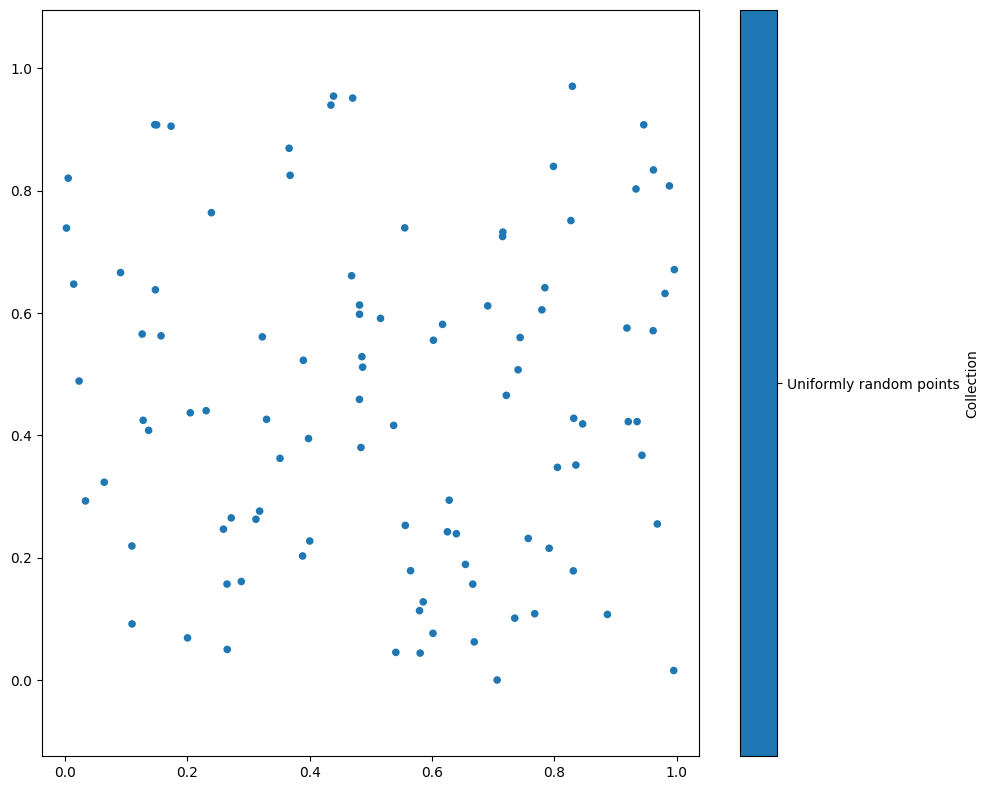

In [5]:
#lets visualized the points inside the domain
import matplotlib.pyplot as plt

#visualized the domain using MuSpAn's visualisation tool
ms.visualise.visualise(my_domain)

In [9]:
#now see the boundary computer my muspan
print(my_domain.boundary)
print(my_domain.boundary.vertices)
#print(my_domain.vertices)

Shape: ID -1, formed of 4 vertices
[104, 105, 106, 107]


Vertex IDs:[104, 105, 106, 107]
Vertices coordinate:[[2.56298160e-03 1.65353400e-04]
 [2.56298160e-03 9.70839370e-01]
 [9.96352021e-01 9.70839370e-01]
 [9.96352021e-01 1.65353400e-04]]
Domain area: 0.9646451988186558


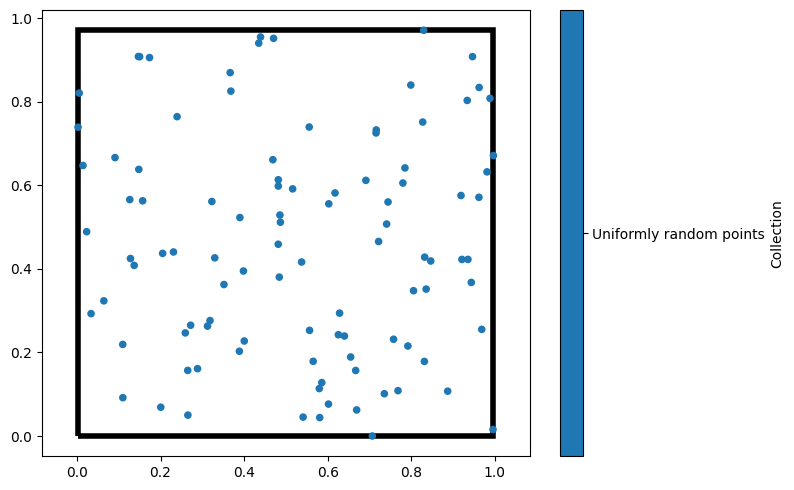

In [10]:
plt.figure(figsize=(8,5))

#visalized the points with the boundary automaticcaly computed by muspan 
ms.visualise.visualise(my_domain, ax=plt.gca(), show_boundary = True)

#each point have and ID defined by muspan when the points were added to domain, lets visualized the IDs of the boundary
boundary_vertex_IDs = my_domain.boundary.vertices
print(f'Vertex IDs:{boundary_vertex_IDs}')

#print the coordinate of the boundaries vetices
print(f'Vertices coordinate:{my_domain.vertices[boundary_vertex_IDs]}')

#print the area of the domain boundary
print(f"Domain area: {my_domain.boundary.area}")


(<Figure size 800x500 with 2 Axes>, <Axes: >)

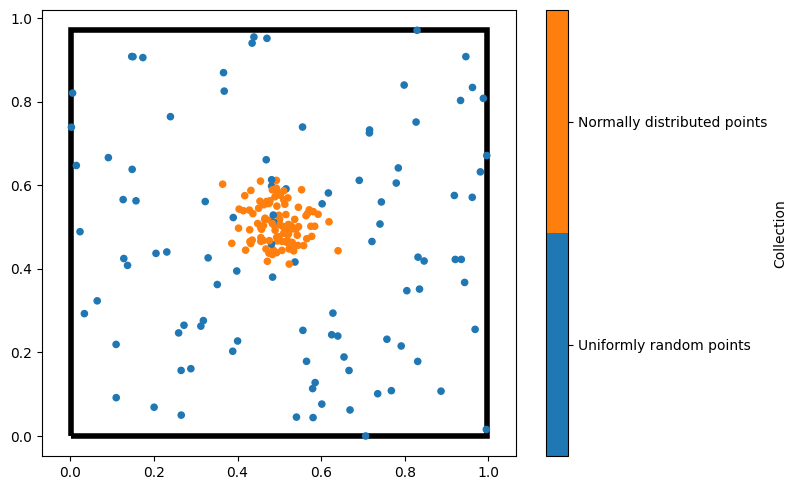

In [11]:
#Add more points to the domain
#define mean ad stand. dev of a normal distribution
mean = 0.5
sd = 0.05

#generate an array of 100 with normally distributed x and y coords
more_points = np.random.normal(loc=mean, scale=sd, size=(100,2))

#add the generated points to the domain
my_domain.add_points(more_points, "Normally distributed points")

plt.figure(figsize=(8,5))

#visualized the domain
ms.visualise.visualise(my_domain, ax=plt.gca(), show_boundary = True)

# Importing data from CSV files and labels

In [3]:
#import the library
import pandas as pd
import os
import muspan as ms

In [4]:
#Load the dataset
df = pd.read_csv("ROI-0_MainText.csv")
print(df.head())

   Unnamed: 0      x      y       Celltype  Celltype_asNumeric Epithelium  \
0           0  15.00   2.00  T Helper Cell                   5   Negative   
1           1  36.75   6.75  T Helper Cell                   5   Negative   
2           2  11.75   8.25  T Helper Cell                   5   Negative   
3           3  65.75   9.00  T Helper Cell                   5   Negative   
4           4  22.25  10.75  T Helper Cell                   5   Negative   

   Epithelium_asNumeric        CD4  CD4_asNumeric  
0                     0   4.461036       4.461036  
1                     0   9.262379       9.262379  
2                     0   6.959003       6.959003  
3                     0  16.364574      16.364574  
4                     0   4.528144       4.528144  


In [6]:
import numpy as np
#extract x and y columus from the dataframe and convert them to a numpy array
points = np.asarray([df["x"], df["y"]])

#print the shape of the arrays
print(np.shape(points))


(2, 6785)


Domain name: Mouse cell
Number of objects: 6785
Collections: ['Cell centres']
Labels: [] 
Networks: [] 
Distance matrices: []


(<Figure size 800x500 with 2 Axes>, <Axes: >)

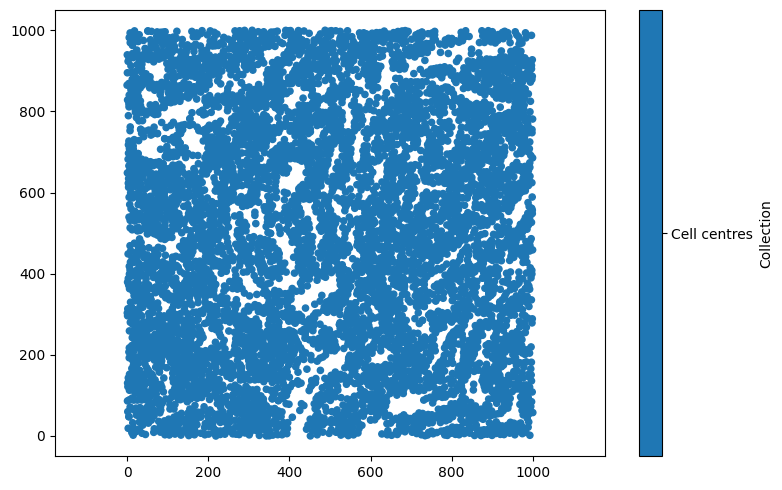

In [7]:
""""
have a 2x6785 numpy array, in order to add it to muspan it need to be nx2 dimensional, so we transpose the array to make the
the dimension of the array suitable for muspan
"""

#Create a MuSpAn domain
domain = ms.domain("Mouse cell")

#add the the transposed array
domain.add_points(points.T, "Cell centres")

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))

#visualize the domain
print(domain)
ms.visualise.visualise(domain, ax=plt.gca())

In [11]:
#Let's add a label to each cell centre describing its cell type
#extract the labels(eg. cell type) from the data frame
celltype_array = df["Celltype"]

#Add the cell type labels to the domain
domain.add_labels("Celltype", celltype_array)
print(domain)
domain.print_labels()

Domain name: Mouse cell
Number of objects: 6785
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []
                Celltype
object_id               
0          T Helper Cell
1          T Helper Cell
2          T Helper Cell
3          T Helper Cell
4          T Helper Cell
...                  ...
6780          Epithelium
6781          Epithelium
6782          Epithelium
6783          Epithelium
6784          Epithelium

[6785 rows x 1 columns]


(<Figure size 800x500 with 2 Axes>, <Axes: >)

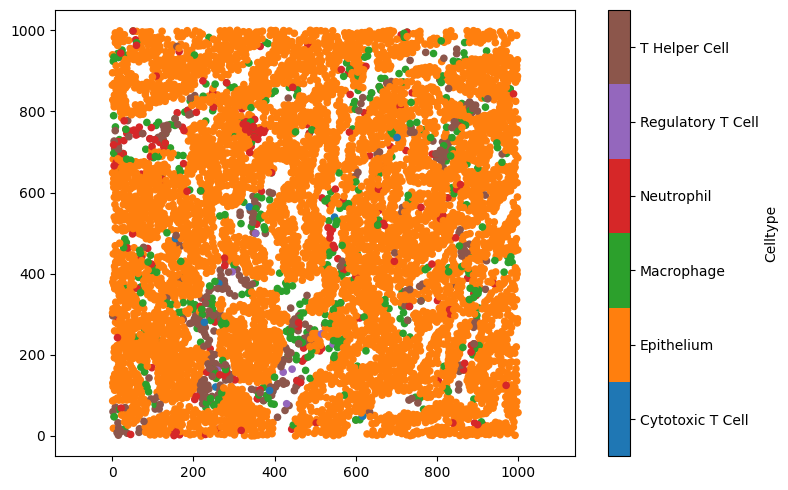

In [12]:
plt.figure(figsize=(8,5))

#visualise the domain, colouring objects by the "Celltype" label
ms.visualise.visualise(domain, "Celltype", ax=plt.gca())

(<Figure size 800x500 with 2 Axes>, <Axes: >)

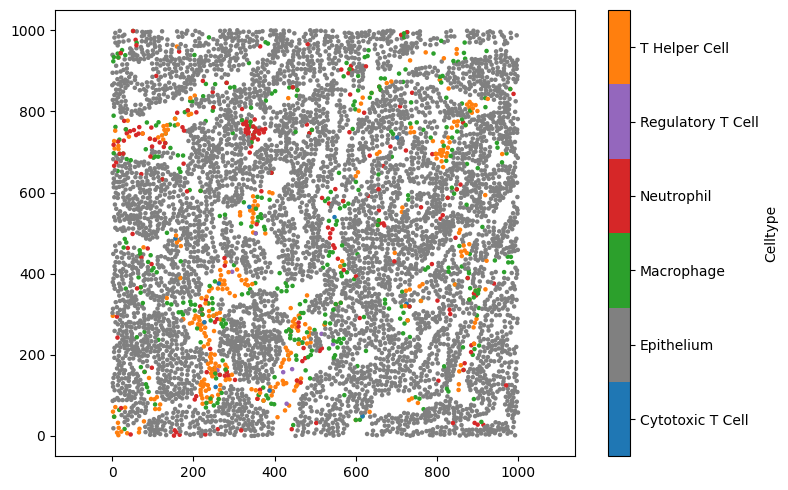

In [13]:
#too much orange since the epithelium are the most abbundat ones, lets color them with gray
#lets also use smaller marker in order to avoid overlapping

#Define new colors
new_colors = {"Epithelium": "grey", "T Helper Cell": plt.cm.tab10(1)}

#update the colors in the domain for the "Celltype" label
domain.update_colors(new_colors, label_name="Celltype")

plt.figure(figsize=(8,5))

#visualise the domain, colouring objects by the "Celltype" label with updated colors and smaller markers
ms.visualise.visualise(domain, "Celltype", ax=plt.gca(), marker_size=5)

(<Figure size 800x500 with 2 Axes>, <Axes: >)

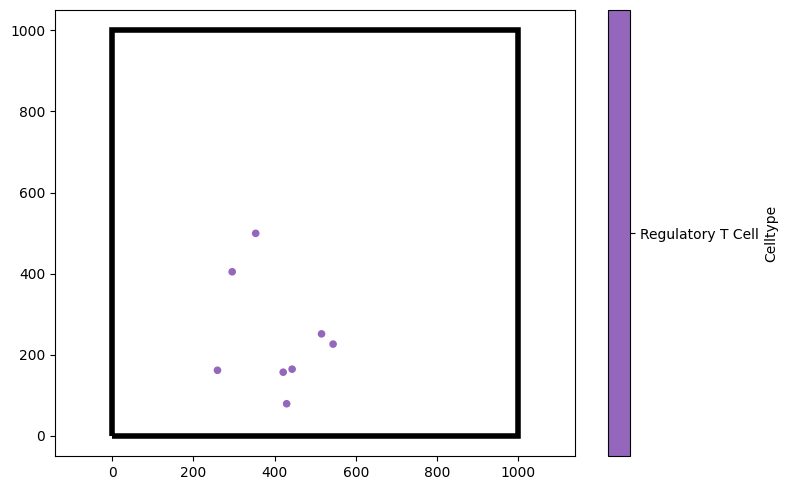

In [14]:
#now show only a certain type of cells
plt.figure(figsize=(8,5))

ms.visualise.visualise(domain, "Celltype", objects_to_plot=("Celltype", "Regulatory T Cell"), ax=plt.gca(), show_boundary=True)

(<Figure size 800x500 with 2 Axes>, <Axes: >)

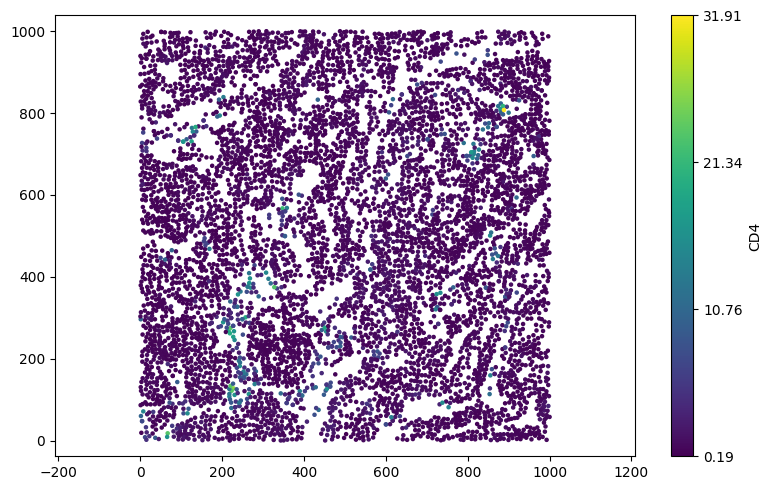

In [17]:
"""
Celltype is a discrete labels, we can also assign continuos labels such as intesity expression of a gene (e.g. CD4 intesity)
"""
# extract CD4 intensity from data frame
CD4_intensity  = df["CD4"]

domain.add_labels("CD4", CD4_intensity, cmap="viridis")

plt.figure(figsize=(8,5))

#visualise the domain colouring objects by the CD4 labels
ms.visualise.visualise(domain, "CD4", ax=plt.gca(), marker_size=5)

In [19]:
print(domain)

Domain name: Mouse cell
Number of objects: 6785
Collections: ['Cell centres']
Labels: ['Celltype', 'CD4'] 
Networks: [] 
Distance matrices: []


(<Figure size 800x500 with 3 Axes>, <Axes: >)

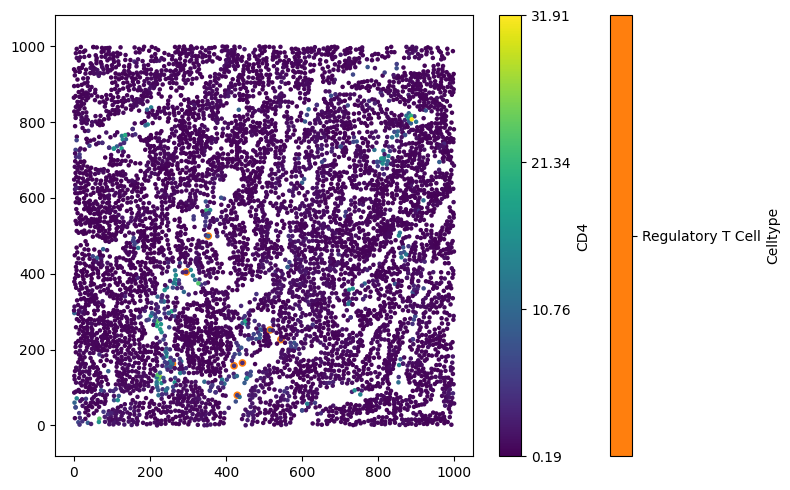

In [36]:
#Now try to visualise Tcells with CD4 expression associate
plt.figure(figsize=(8,5))
new_colors = {"Epithelium": "grey", "Regulatory T Cell": plt.cm.tab10(1)}
#update the colors in the domain for the "Celltype" label
domain.update_colors(new_colors, label_name="Celltype")

ms.visualise.visualise(domain, "Celltype", objects_to_plot=("Celltype", "Regulatory T Cell"), ax=plt.gca())   
ms.visualise.visualise(domain, "CD4", ax=plt.gca(), marker_size=5)

#non funziona come vorrei, probabilmente devo selezionare le cellule di interesse dal df inziale e poi con queste creare un nuovo dominio
#per poi vedere la differenza in espressione di solo queste cellule

In [33]:
df[df["Celltype"] == "Regulatory T Cell"]

,Unnamed: 0,x,y,Celltype,Celltype_asNumeric,Epithelium,Epithelium_asNumeric,CD4,CD4_asNumeric
314,314,429.75,79.50,Regulatory T Cell,4,Negative,0,5.828871,5.828871
315,315,421.25,157.25,Regulatory T Cell,4,Negative,0,4.989995,4.989995
316,316,259.25,162.00,Regulatory T Cell,4,Negative,0,10.944139,10.944139
317,317,443.25,164.75,Regulatory T Cell,4,Negative,0,3.891917,3.891917
318,318,295.50,404.75,Regulatory T Cell,4,Negative,0,3.491639,3.491639
319,319,544.25,226.50,Regulatory T Cell,4,Negative,0,3.648031,3.648031
320,320,515.75,251.75,Regulatory T Cell,4,Negative,0,9.131817,9.131817
321,321,353.50,499.50,Regulatory T Cell,4,Negative,0,9.251854,9.251854


# Shapes
As well as points, MuSpAn objects can also be lines or shapes. a MuSpAn shapes is a 2D region, defined by a non-self interacting boundary. Shape -> ordered list or array of (nx2) points that define the boundary

(<Figure size 800x500 with 2 Axes>, <Axes: >)

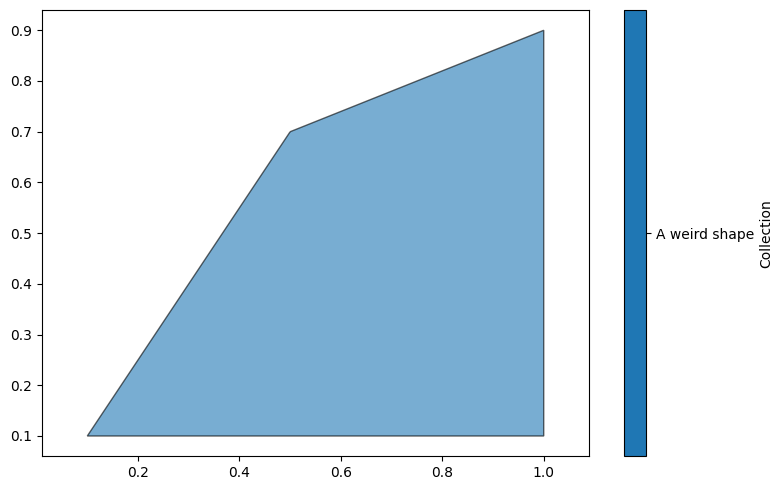

In [38]:
import muspan as ms
import numpy as np
import matplotlib.pyplot as plt

domain = ms.domain("Tutorial 3")

#define a set of point to create a shape
points = np.asarray([[0.1,0.1], [1,0.1], [1, 0.9], [0.5, 0.7]])

domain.add_shapes([points], "A weird shape")

plt.figure(figsize=(8,5))
ms.visualise.visualise(domain, ax=plt.gca())

# Saving and loading domains


In [ ]:
# Define the directory ad filename for saving the domain
directory = "." #current directory
file_name = "my_domain"

#save the domain
ms.io.save_domain(domain, path_to_save=directory, name_of_file=filename)

In [ ]:
#Load the previously saved domain from the file
another_domain = ms.io.load_domain("./my_domain")

# Query
query module one of the most powerful tool in MuSpAn. Allow to the user to select specific objects within the domain, according to some desired critera, extract those objects and perform action on them (such as detalied spatial analysis, plotting and so on)

In [18]:
import muspan as ms
import matplotlib.pyplot as plt
import numpy as np

In [20]:
domain = ms.datasets.load_example_domain("Xenium-Healthy-Colon")

#plt.figure(figsize=(10,6))

#Visualized the domain with a specific marker size
#ms.visualise.visualise(domain , ax=plt.gca(), marker_size=0.1) #heavy to compute

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


In [24]:
domain.vertices

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00],
       ...,
       [1.45987500e+03, 4.38175000e+03],
       [1.95708032e+03, 4.38175000e+03],
       [1.95708032e+03, 3.87642529e+03]], shape=(161651, 2))

In [46]:
domain.collections["Cell boundaries"]

{'collection_name': 'Cell boundaries',
 'collection_name_integer': 0,
 'objects': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.849e+03, 1.850e+03,
        1.851e+03], shape=(1852,))}

In [37]:
domain.collections["Cell boundaries"]["objects"][5]

np.float64(5.0)

In [44]:
domain.labels["Cluster ID"][""]

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.849e+03, 1.850e+03,
       1.851e+03], shape=(1852,))

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

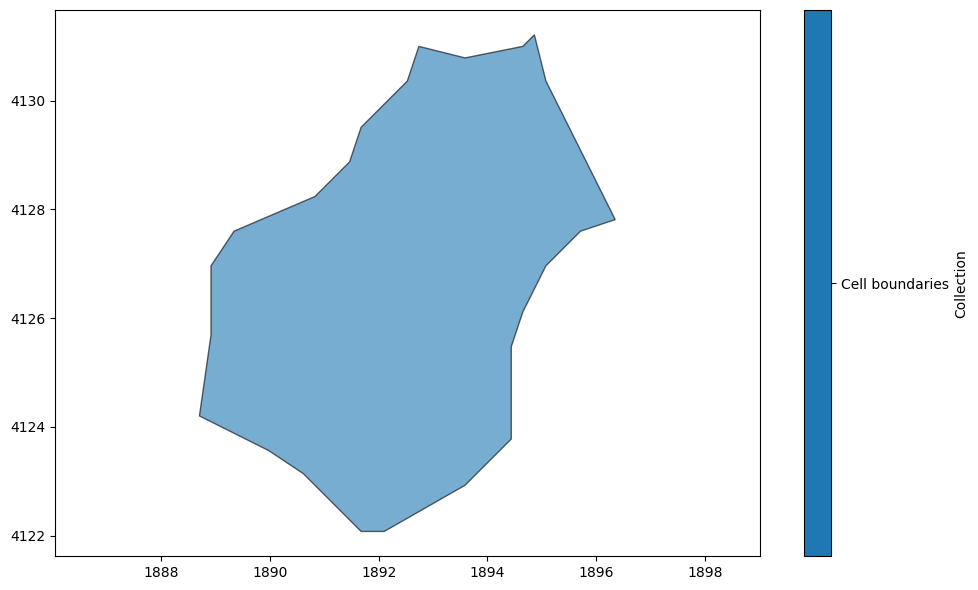

In [57]:
#Create a new figure with a specified size
plt.figure(figsize=(10,6))

#Visualized the domain, plotting only specific objects with given IDs
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=([0]))

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

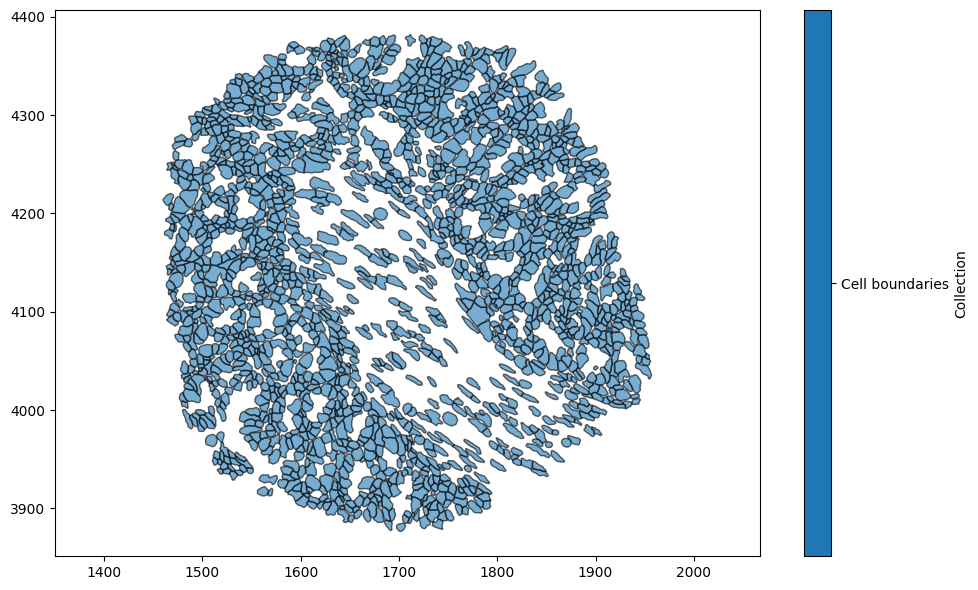

In [58]:
plt.figure(figsize=(10, 6))

#Visualized the domain, plotting only objects that are in the "Cell boundaries" collection
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=("Collection", "Cell boundaries"))